# Logistic Regression for Classifying Success of an Advertisement  using Synthetic Advertising Data set

In this project, a synthetic advertising data set, which is provided in the  course "Python for Data Science and Machine Learning Bootcamp" , is used to indicate whether or not a particular internet user clicked on an Advertisement on a company website.  The features used to create the logistic regression model is defined as follows:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Read and Analyze the Data
* Reading the advertising .csv file and calling it  Data
* Creating a jointplot showing Area Income versus Age
* Creating a jointplot showing the kde distributions of Daily Time spent on site versus Age

In [2]:
Data = pd.read_csv('C:/homa/python/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv')

In [3]:
Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


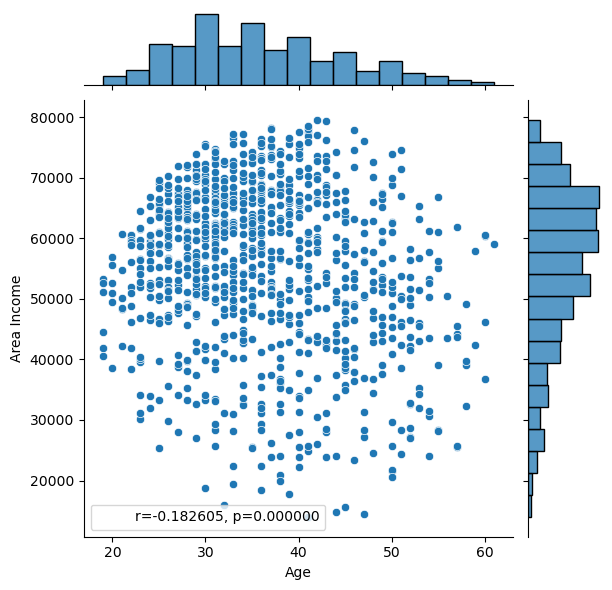

In [6]:
import scipy.stats as stats
graph = sns.jointplot(data=Data, x=Data['Age'], y=Data['Area Income'])
r, p = stats.pearsonr(Data['Age'],Data['Area Income'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


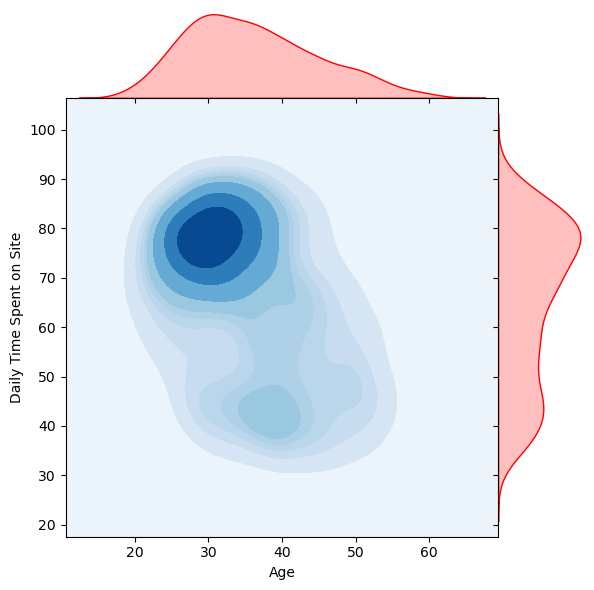

In [7]:
import matplotlib.pyplot as plt 


sns.jointplot(x='Age',y='Daily Time Spent on Site',data=Data,color='red',kind='kde', space=0, fill=True, thresh=0, cmap='Blues');
plt.show() 


# Implementing Logistic Regression Model

* Spliting the data into training set and testing set
* Training and fitting a logistic regression model on the training set
* predicting values for the testing data
*  Creating a classification report and confusion matrix for the logestic regression model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X =Data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = Data['Clicked on Ad']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.33, 
                                                    random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [13]:
predictions = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [16]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = confusion_matrix(y_test_list, predicted_labels_list).ravel()
    print('specifity',tn/(fp+tn))
    print('sensitivity',tp/(tp+fn))

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix,title='Confusion matrix, without normalization')
    plt.show()

#     # Plot normalized confusion matrix
#     plt.figure()
#     generate_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')
#     plt.show()

In [17]:
def generate_confusion_matrix(cnf_matrix, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are 
    
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    plt.title(title)
    plt.colorbar()
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

specifity 0.9629629629629629
sensitivity 0.8511904761904762
Confusion matrix, without normalization


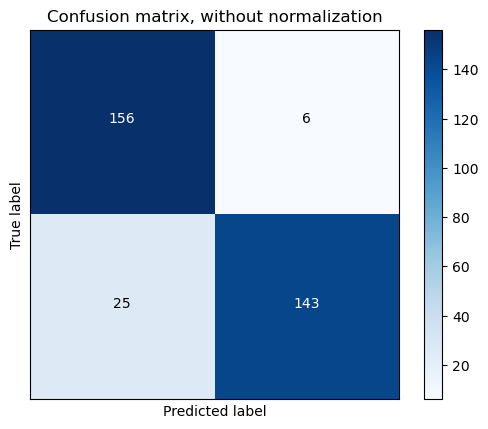

In [18]:
plot_confusion_matrix(predictions, y_test)


# ROC CURVE

In order to compare the performance of the classifiers, the 
  receiving operating curve (ROC)  is generated by plotting the true positive rate (TPR) against the false positive rate (FPR) for each classifier, and the corresponding area under the curves (AUC) is calculated.

In [19]:
import sklearn.metrics as metrics


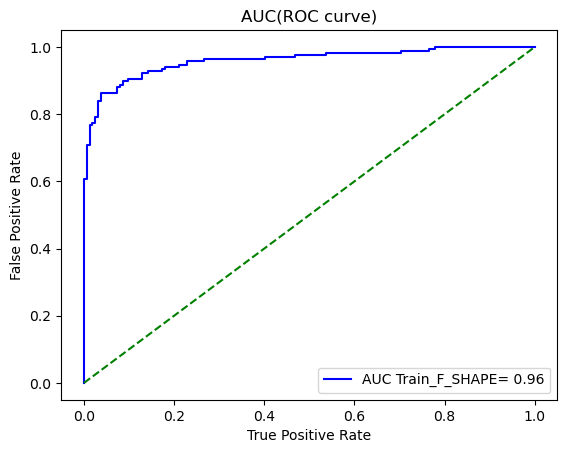

In [20]:
yhat_test = logmodel.predict_proba(X_test)
yhat_test=yhat_test[:,1]

test_fpr, test_tpr, te_thresholds = roc_curve(y_test, yhat_test,drop_intermediate=False)

# plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr,'b-', label= 'AUC Train_F_SHAPE= %0.2f' % auc(test_fpr, test_tpr))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Implementing Random Forest  Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rfc_pred = rfc.predict(X_test)


In [23]:
print(confusion_matrix(y_test,rfc_pred))

[[158   4]
 [ 12 156]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       162
           1       0.97      0.93      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



# ROC Curve for evaluating the performance of random forest classifier

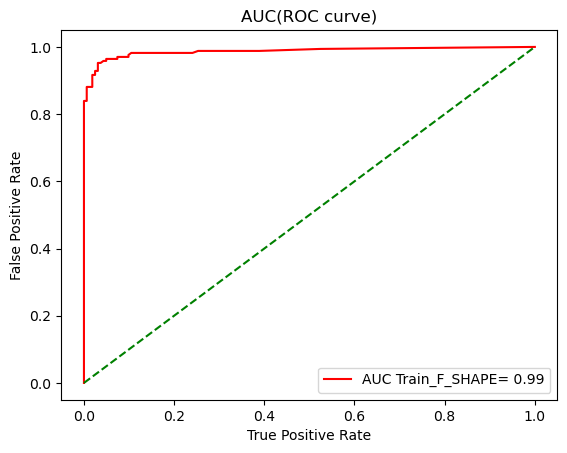

In [25]:
yhat_test_Fshape = rfc.predict_proba(X_test)
yhat_test_Fshape=yhat_test_Fshape[:,1]

train_fpr_Fshape, train_tpr_Fshape, te_thresholds = roc_curve(y_test, yhat_test_Fshape,drop_intermediate=False)

# plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(train_fpr_Fshape, train_tpr_Fshape,'r-', label= 'AUC Train_F_SHAPE= %0.2f' % auc(train_fpr_Fshape, train_tpr_Fshape))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Implementing  Support Vector Machine Classifier (SVM)  Model
 

In [26]:
from sklearn.svm import SVC

In [27]:
svc_model = SVC(probability=True)

In [28]:
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [29]:
 SVC(probability=True)

SVC(probability=True)

In [30]:
predictions = svc_model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,predictions))

[[139  23]
 [ 80  88]]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       162
           1       0.79      0.52      0.63       168

    accuracy                           0.69       330
   macro avg       0.71      0.69      0.68       330
weighted avg       0.72      0.69      0.68       330



# ROC Curve for evaluating the performance of SVM classifier

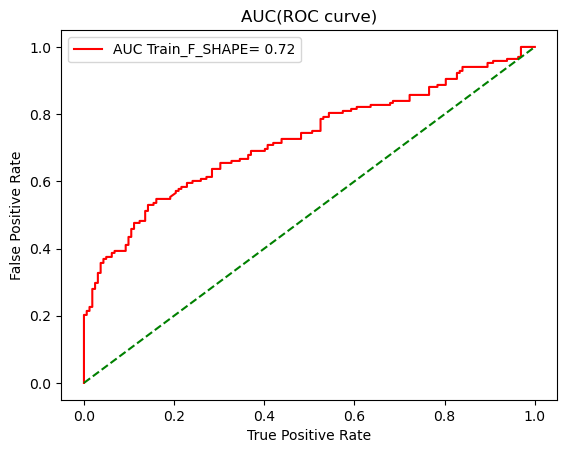

In [34]:
yhat_train_Fshape = svc_model.predict_proba(X_test)
yhat_train_Fshape=yhat_train_Fshape[:,1]

train_fpr_Fshape, train_tpr_Fshape, te_thresholds = roc_curve(y_test, yhat_train_Fshape,drop_intermediate=False)

# plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(train_fpr_Fshape, train_tpr_Fshape,'r-', label= 'AUC Train_F_SHAPE= %0.2f' % auc(train_fpr_Fshape, train_tpr_Fshape))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Implementing  Support Vector Machine Classifier (SVM)  with  gridsearch


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [37]:
grid = GridSearchCV( SVC(probability=True),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [38]:
grid_predictions = grid.predict(X_test)

In [39]:
print(confusion_matrix(y_test,grid_predictions))

[[ 97  65]
 [  7 161]]


In [40]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73       162
           1       0.71      0.96      0.82       168

    accuracy                           0.78       330
   macro avg       0.82      0.78      0.77       330
weighted avg       0.82      0.78      0.77       330



In [41]:
# ROC Curve for evaluating the performance of SVM classifier with  gridsearch

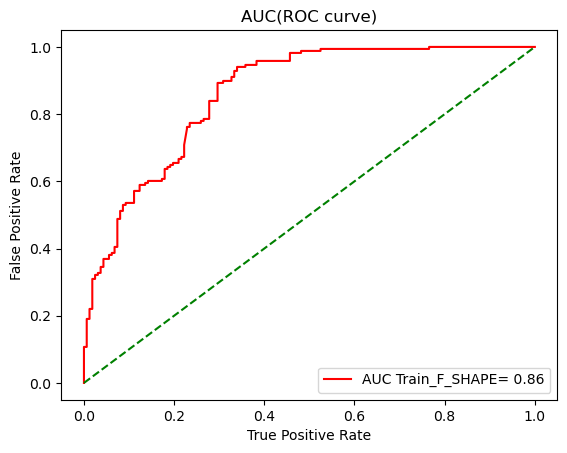

In [42]:
yhat_train_Fshape = grid.predict_proba(X_test)
yhat_train_Fshape=yhat_train_Fshape[:,1]

train_fpr_Fshape, train_tpr_Fshape, te_thresholds = roc_curve(y_test, yhat_train_Fshape,drop_intermediate=False)

# plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(train_fpr_Fshape, train_tpr_Fshape,'r-', label= 'AUC Train_F_SHAPE= %0.2f' % auc(train_fpr_Fshape, train_tpr_Fshape))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()